<a href="https://colab.research.google.com/github/WisdomVoyager/Treadmill_Buyer_Profiling_in_Python/blob/main/AEROFIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TREADMILL BUYER PROFILING

####The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
####Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Product Portfolio:
* The KP281 is an entry-level treadmill that sells for $1,500.
* The KP481 is for mid-level runners and sells for $1,750.
* The KP781 treadmill is having advanced features and it sells for $2,500.


* Product - product purchased: KP281, KP481, or KP781
* Age - in years
* Gender - male/female
* Education - in years
* MaritalStatus - single or partnered
* Usage - the average number of times the customer plans to use the treadmill each week
* Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
* Income - annual income in US dollars
* Miles - the average number of miles the customer expects to walk/run each week





## Data and Setup

In [ ]:
# Load essential python libraries
import pandas as pd  # Data handling and analysis
import numpy as np  # Numeric operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced data visualization
sns.set(color_codes = True)
import scipy.stats as stats #Statistics


## Read in the all csv file and storing as Pandas dataframe

In [ ]:
# Importing data
aerofit_df = pd.read_csv('/content/drive/MyDrive/dataset/Aerofit Treadmill Buyer/aerofit_treadmill_data.csv')
# Reading dataframe
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Shape of the dataframe
df_shape = aerofit_df.shape

# Name of each column in the dataframe
df_columns = aerofit_df.columns

# Datatype of each column in the dataframe
df_dtypes = aerofit_df.dtypes

# Printing the results
print("DataFrame Shape:", df_shape)

print("Columns:", df_columns)

print("Data Types:", df_dtypes)

DataFrame Shape: (180, 9)
Columns: Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')
Data Types: Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


The DataFrame includes columns with the 'object' data type, where each column consists of a predefined set of labels. To enhance efficiency, we can optimize memory usage by converting these columns to the 'category' data type.

In [ ]:
# Converting specific columns to categorical data type
aerofit_df['Product'] = aerofit_df['Product'].astype('category')
aerofit_df['Gender'] = aerofit_df['Gender'].astype('category')
aerofit_df['MaritalStatus'] = aerofit_df['MaritalStatus'].astype('category')

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


## Statistical Overview

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Calculate Skewness of DataFrame Columns
aerofit_df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [ ]:
# Display the descriptive statistics
aerofit_df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
# Check for missing values in the DataFrame
aerofit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# no missing values found in DataFrame

In [ ]:
# Identify duplicate records in the dataset
aerofit_df.duplicated(subset=None,keep='first').sum()

0

In [ ]:
# no duplicate values found in the dataset

## **Key Observations**

After analyzing the dataset, the following noteworthy observations can be made:

1.   **Data Completeness**: The dataset is complete, containing no missing values.

2.   **Product Diversity**: The dataset covers 3 unique treadmill `products`, with `"KP281"` being the most frequently purchased product.

3.   **Age Distribution**: `Age` varies from a minimum of 18 to a maximum of 50 years, with a `mean` 28.79. Furthermore, 75% of individuals have an age of 33 years or less.

4.   **Educational Attainment**: Around 75% of individuals possess 16 years of education or less.

5.   **Gender Distribution**: Among the 180 data points, 104 `gender` to males, while the remaining represent females.

6.   **Income and Miles**: The high standard deviation values for `Income` and `Miles` suggest the presence of potential outliers within these variables, which might warrant further investigation.


## Categorizing Descriptive Analytics

In [ ]:
# Product Information
print(aerofit_df["Product"].value_counts())
print(aerofit_df["Product"].unique())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']


In [ ]:
# Gender Distribution
print(aerofit_df["Gender"].value_counts())
print(aerofit_df["Gender"].unique())

Male      104
Female     76
Name: Gender, dtype: int64
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


In [ ]:
# Marital Status Distribution
print(aerofit_df["MaritalStatus"].value_counts())
print(aerofit_df["MaritalStatus"].value_counts())

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [ ]:
# Data Diversity
aerofit_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Individual Characteristics:

In [ ]:
# Unique Age Values
aerofit_df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
# Unique Education Values:
aerofit_df["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
# Unique Usage Values
print(aerofit_df["Usage"].unique())

[3 2 4 5 6 7]


In [ ]:
# Unique Income Values
print(aerofit_df["Income"].unique())

[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


In [ ]:
# Unique Fitness Values:
print(aerofit_df["Fitness"].unique())

[4 3 2 1 5]


In [ ]:
# Unique Miles Values
print(aerofit_df["Miles"].unique())

[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


## Visual Data Exploration

### Distribution Analysis

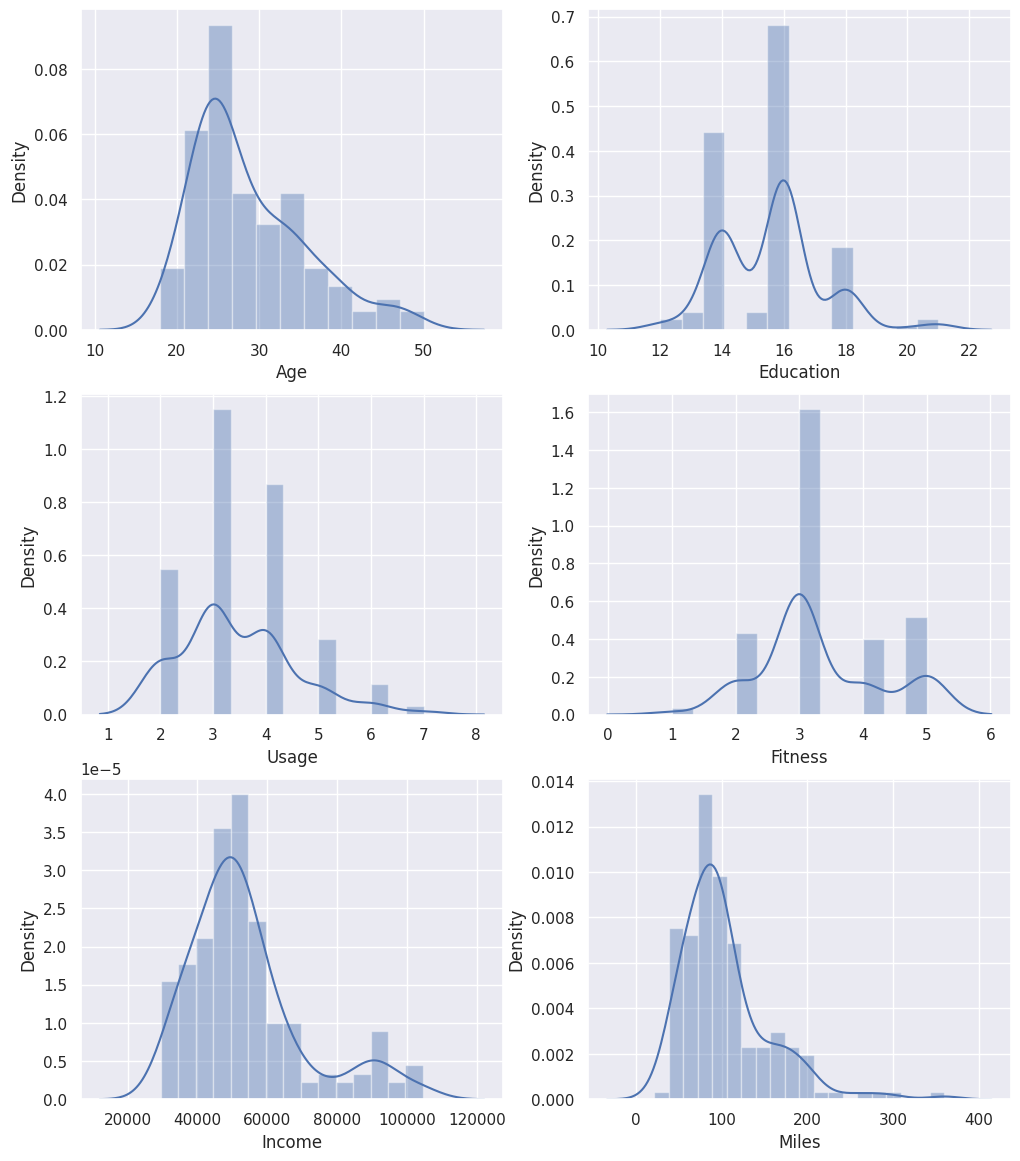

In [ ]:
# Creating subplots for distribution analysis
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

# Plotting distributions of various variables
sns.distplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(aerofit_df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(aerofit_df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(aerofit_df['Income'], kde=True, ax=axis[2,0])
sns.distplot(aerofit_df['Miles'], kde=True, ax=axis[2,1])

# Display the distribution plots
plt.show()

### **Key Obeservationd from the Distribution Plot**

* **Outliers Detected:**
The distribution plots reveal noteworthy outliers in both the `'Miles'` and `'Income'` variables.

* **Right-Skewed Distributions:**
Notably, `'Miles'` and `'Income'` exhibit right-skewed distributions, indicating a concentration of values towards the lower end.

* **Fitness Level Influence:**
Customers with a `fitness` level of 3 are prominent purchasers, constituting a significant portion of treadmill buyers.

* **Income Range Focus:**
The majority of customers fall within the `income` range of $40000 to $65000 demonstrating a central `income` concentration.

* **Age Range Focus:**
The majority of customers fall within the `Age` of 25 demonstrate greater health consciousness, exhibiting higher treadmill usage compared to older age groups.

### Analyzing Outliers Through Box Plots

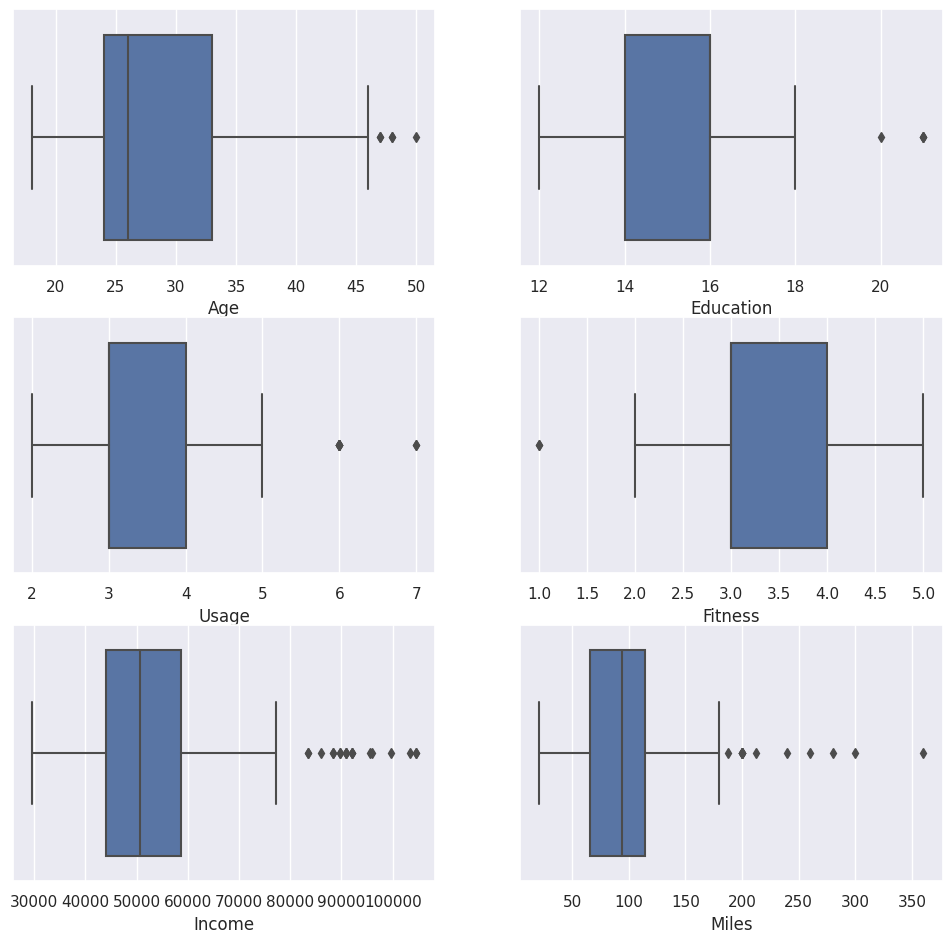

In [ ]:
# Creating subplots for box plots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2)

# Generating box plots for various variables
sns.boxplot(data=aerofit_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x="Miles", orient='h', ax=axis[2,1])

# Display the box plots
plt.show()

### **Key Obeservationd from the Box Plot**

*   `Age`, `Education`, `Fitness` and `Usage` variables display minimal outlier presence.

*   Conversely, `Income` and ` Miles` variables exhibit a higher frequency of outliers.

1. **Usage Preference:**
   - The most preferred usage frequency among customers is 3 to 4 days per week.
   - A few customers **(outliers)** use the treadmill 6 or 7 days per week, which is a relatively higher usage pattern.

2. **Age Distribution:**
   - The age group ranging from 23 to 34 years is the most common among customers who have purchased the products.
   - There are very few customers above the age of 45 years, indicating a younger customer base in the dataset.

3. **Income Range:**
   - Some customers earn above 80K per annum **(outliers)**, but the majority falls within the income range of 45K to around 60K per annum.

4. **Fitness Ratings:**
   - A couple of customers have rated their fitness level as 1 - Poor Shape.
   - The majority of customers have fitness ratings ranging from 3.0 to 4.0, indicating a moderately good fitness level.

These insights provide a snapshot of usage preferences, customer age distribution, income ranges, and fitness ratings among the dataset. They can be valuable for understanding customer behaviors and tailoring marketing strategies to different customer segments.


### Outlier Handling for Income Column

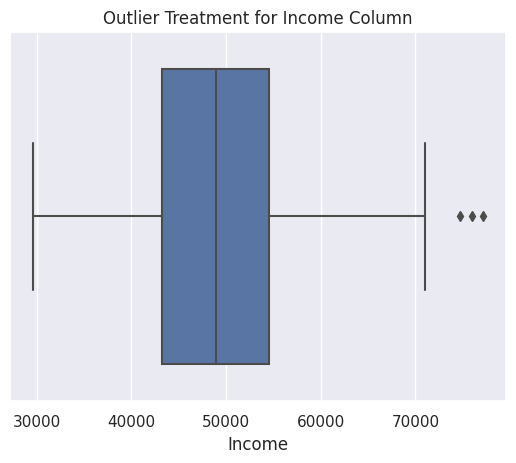

In [ ]:
# Creating a copy of the DataFrame
aerofit_df1 = aerofit_df.copy()

# Calculating the quartiles and IQR for outlier detection
Q3 = aerofit_df1['Income'].quantile(0.75)
Q1 = aerofit_df1['Income'].quantile(0.25)
IQR = Q3 - Q1

# Applying outlier treatment by removing values beyond 1.5 * IQR from the quartiles
aerofit_df1 = aerofit_df1[(aerofit_df1['Income'] > Q1 - 1.5 * IQR) & (aerofit_df1['Income'] < Q3 + 1.5 * IQR)]

# Displaying the box plot after outlier treatment
sns.boxplot(data=aerofit_df1, x="Income", orient='h')
plt.title("Outlier Treatment for Income Column")
plt.show()

### Outlier Handling for Miles Feature

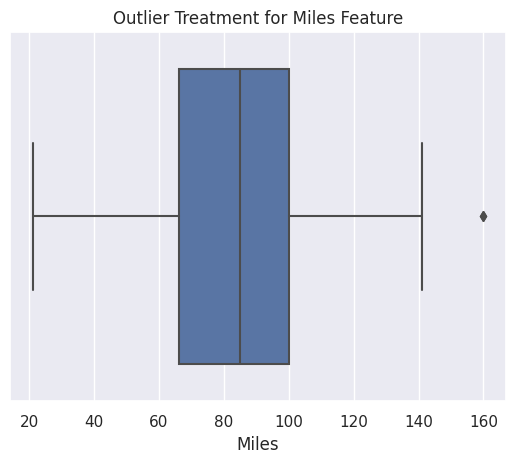

In [ ]:
# Calculating quartiles and IQR for outlier detection
Q3 = aerofit_df1['Miles'].quantile(0.75)
Q1 = aerofit_df1['Miles'].quantile(0.25)
IQR = Q3 - Q1

# Applying outlier treatment by removing values beyond 1.5 * IQR from the quartiles
aerofit_df1 = aerofit_df1[(aerofit_df1['Miles'] > Q1 - 1.5 * IQR) & (aerofit_df1['Miles'] < Q3 + 1.5 * IQR)]

# Displaying the box plot after outlier treatment
sns.boxplot(data=aerofit_df1, x="Miles", orient='h')
plt.title("Outlier Treatment for Miles Feature")
plt.show()

Dataset Size Before and After Outlier Removal

In [ ]:
# Displaying the dataset size before outlier removal
print("Dataset Size Before Outlier Removal:", aerofit_df.shape)

# Displaying the dataset size after outlier removal
print("Dataset Size After Outlier Removal:", aerofit_df1.shape)

Dataset Size Before Outlier Removal: (180, 9)
Dataset Size After Outlier Removal: (147, 9)


### Categorical Count

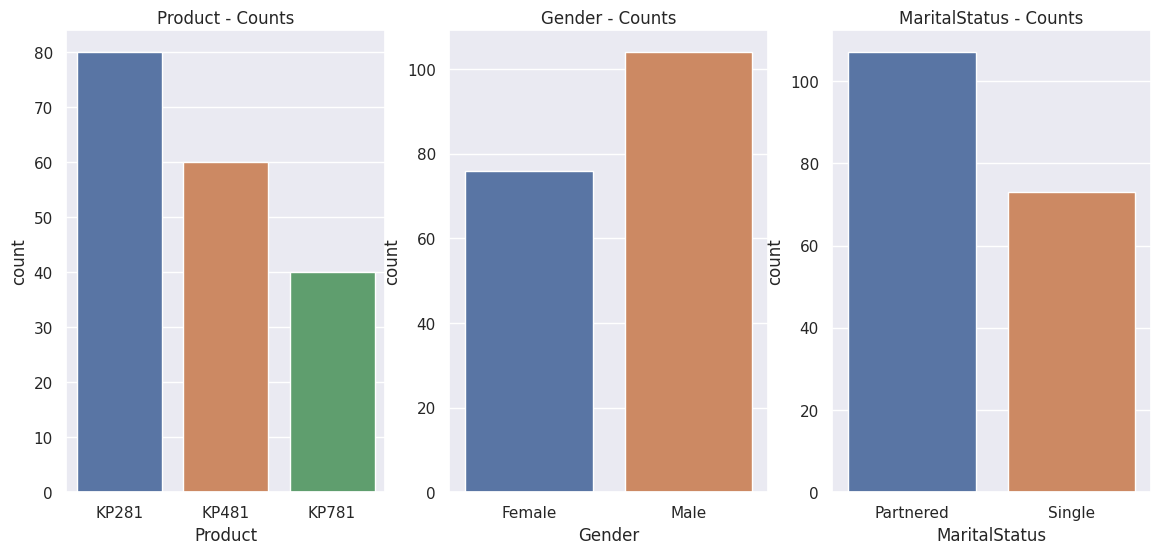

In [ ]:
# Creating subplots for categorical counts
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# Plotting count plots for different categorical variables
sns.countplot(data=aerofit_df, x='Product', ax=axs[0])
sns.countplot(data=aerofit_df, x='Gender', ax=axs[1])
sns.countplot(data=aerofit_df, x='MaritalStatus', ax=axs[2])

# Adding titles to subplots
axs[0].set_title("Product - Counts", pad=5, fontsize=12)
axs[1].set_title("Gender - Counts", pad=5, fontsize=12)
axs[2].set_title("MaritalStatus - Counts", pad=5, fontsize=12)

# Display the count plots
plt.show()

### **Key Obeservationd from the Categorical Count**

*   Among the treadmill products, `"KP281"` stands out as both the most frequent and best-selling option.

*   Within the `'Gender'` category, the number of males using treadmills surpasses that of females.

* Treadmill purchases are more prevalent among individuals who are partnered, as indicated by the `'MaritalStatus'` distribution.



### Categorical Relationships

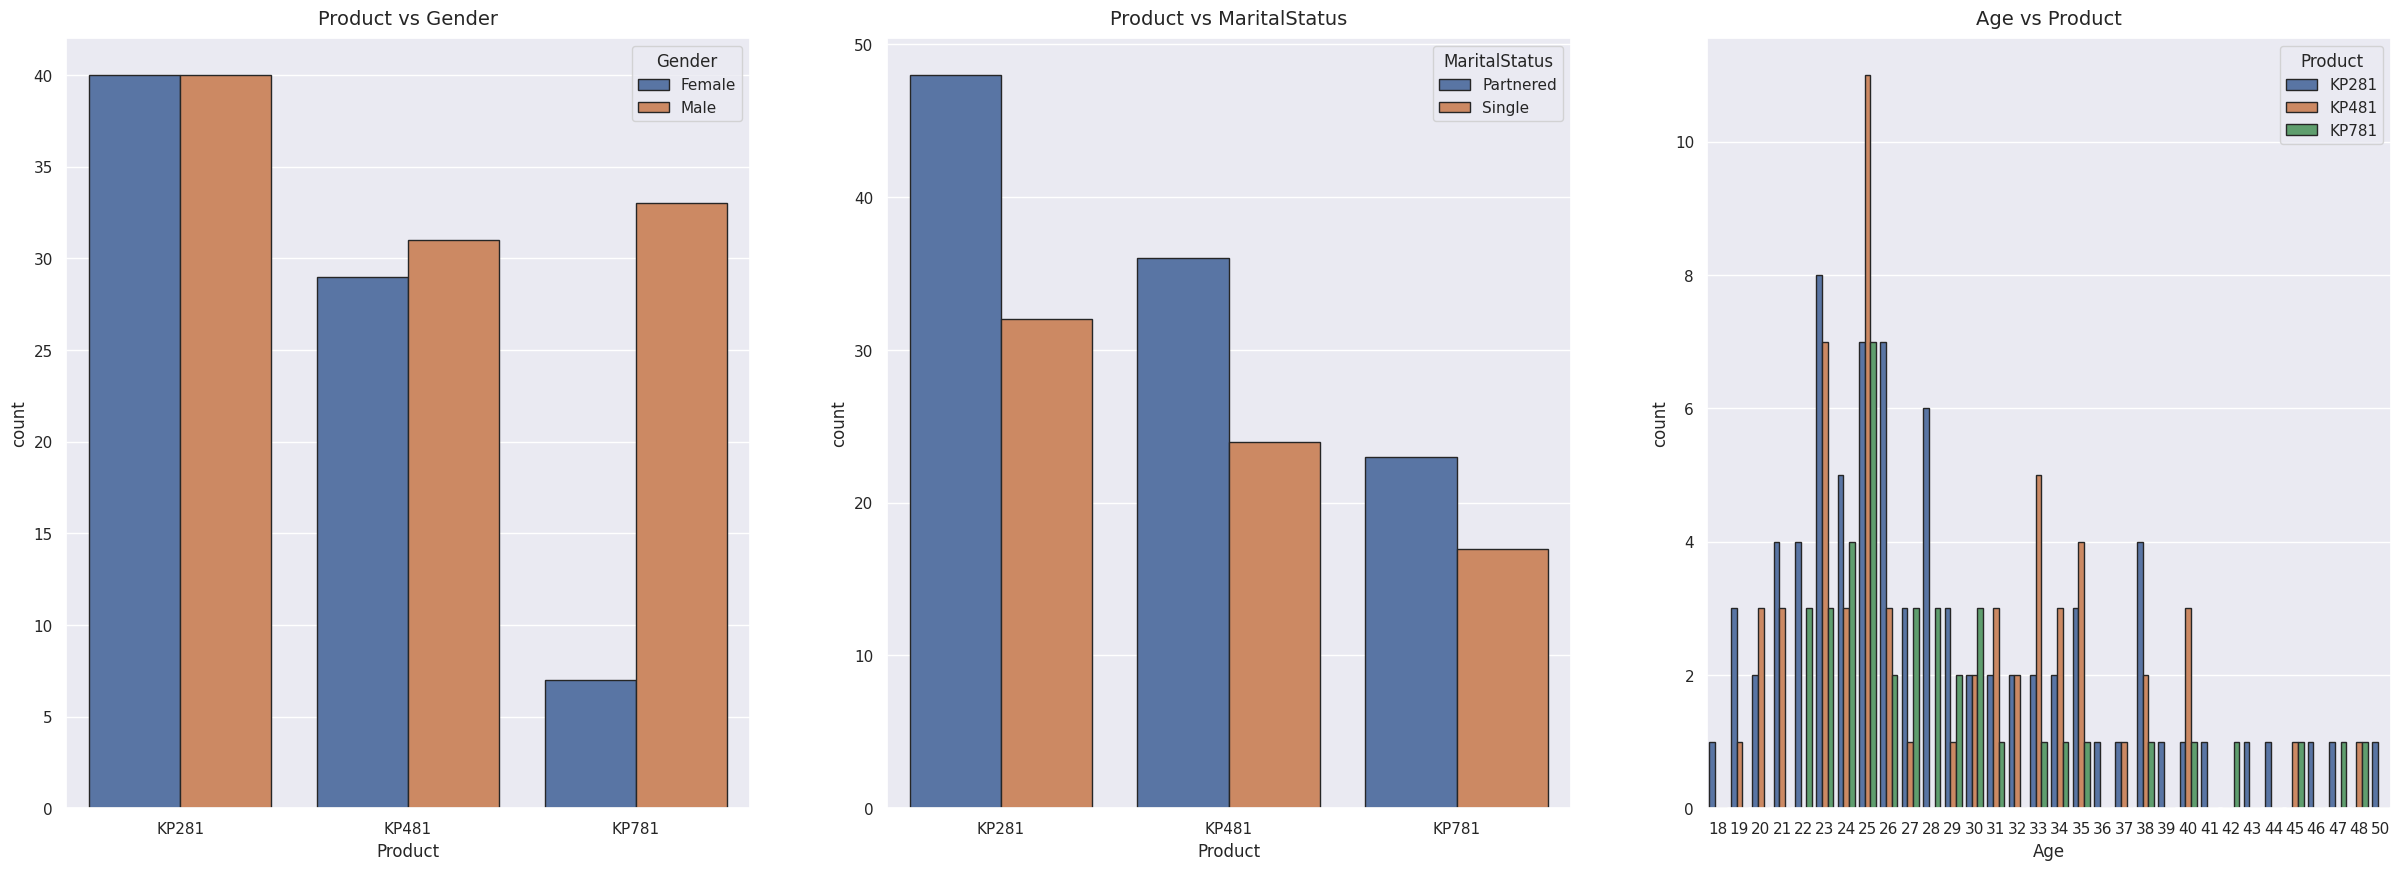

In [ ]:
# Creating subplots for categorical relationships
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Plotting count plots with hue for various categorical relationships
sns.countplot(data=aerofit_df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=aerofit_df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])

# Adding titles to subplots
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
axs[2].set_title("Age vs Product", pad=10, fontsize=14)

# Display the count plots
plt.show()


### **Key Obeservationd from the Categorical Relationships**

1. **Product vs Gender**:

* Both males and females have nearly equal shares of purchases for the `KP281` product.

* The distribution is similar for the `"KP481"` product as well.

* The `"KP781"` product is notably favored by male customers.

2. **Product vs MaritalStatus**:

* Customers who are partnered exhibit a stronger inclination towards making purchases.

3. **Product vs Age**:

* Customers around the age of 25 display a notable preference for the "KP481" product.

### Attribute Comparison Across Products

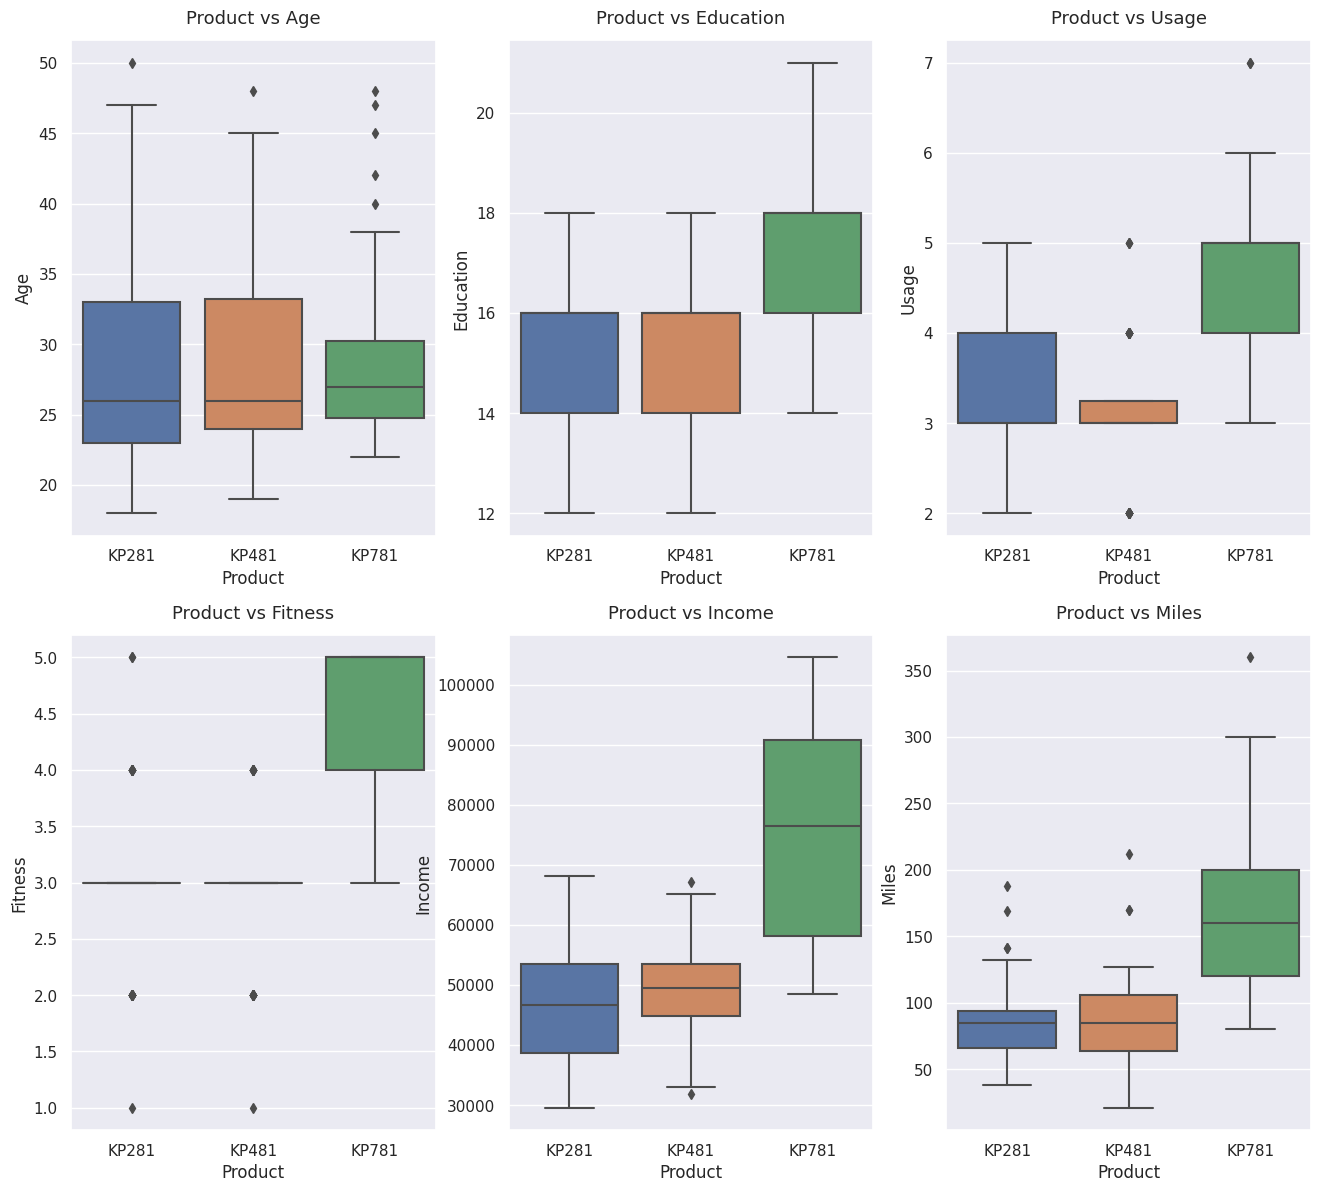

In [ ]:
# List of attributes for comparison
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set seaborn color codes
sns.set(color_codes=True)

# Creating subplots for attribute comparison
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(top=1.2)

# Counter for attribute indexing
count = 0

# Loop through subplots grid
for i in range(2):
    for j in range(3):
        # Creating box plots for each attribute against product
        sns.boxplot(data=aerofit_df, x='Product', y=attributes[count], ax=axs[i,j])

        # Setting subplot title
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)

        # Incrementing attribute counter
        count += 1

# Display the attribute comparison plots
plt.show()

### **Key Observations for Attribute Comparison Across Products** :

Key Observations for Customer Profiling Based on Product Categories:

**Product vs Age:**
- Customers buying "KP281" and "KP481" have similar median ages.
- Customers aged 25 to 30 prefer "KP781."
- "KP481" appeals to a younger customer base.

**Product vs Education:**
- Customers with education levels above 16 prefer "KP781."
- Education levels below 16 show equal preference for "KP281" and "KP481."

**Product vs Usage:**
- Customers planning to use treadmills more than 4 times a week prefer "KP781."
- Others opt for "KP281" or "KP481."

**Product vs Fitness:**
- Higher fitness levels (fitness >= 3) correlate with "KP781" purchases.

**Product vs Income:**
- Higher incomes (Income >= 60000) associate with "KP781" purchases.

**Product vs Miles:**
- Customers expecting to cover over 120 miles per week prefer "KP781."

**General Insights:**
- "KP781" is associated with advanced features and higher income, appealing to customers seeking intense workouts and covering significant distances.
- "KP481" attracts a varied customer base, with usage for both fitness and miles.
- "KP281" is popular due to affordability and comfortable usage.

**Usage Insights:**
- "KP781" users tend to exercise more frequently, covering longer distances.
- "KP481" appeals to customers focusing on covering more miles.
- "KP281" users exhibit moderate usage and distances.

**Fitness Insights:**
- "KP781" is favored by those with higher fitness levels.
- "KP481" and "KP281" products cater to customers with varied fitness levels.

**Age Insights:**
- "KP281" is the choice of customers across ages, possibly due to its affordability and versatility.
- "KP481" is popular among younger customers.
- "KP781" appeals to slightly older customers.

**Education Insights:**
- Customers with higher education tend to prefer "KP781."
- "KP281" and "KP481" are favored by customers with different education levels.

**Income Insights:**
- "KP781" is chosen by customers with higher incomes.
- Other products attract customers across income levels.

**Miles Insights:**
- "KP781" users cover more distance than other product users.
- "KP481" users cover a moderate range of distances.
- "KP281" users cover shorter distances.

**Conclusion:**
- Customers' preferences are influenced by factors such as age, education, fitness level, income, and usage expectations.
- The products cater to different segments, offering options for varied customer profiles and needs.

### Gender-Based Attribute Comparison with Product

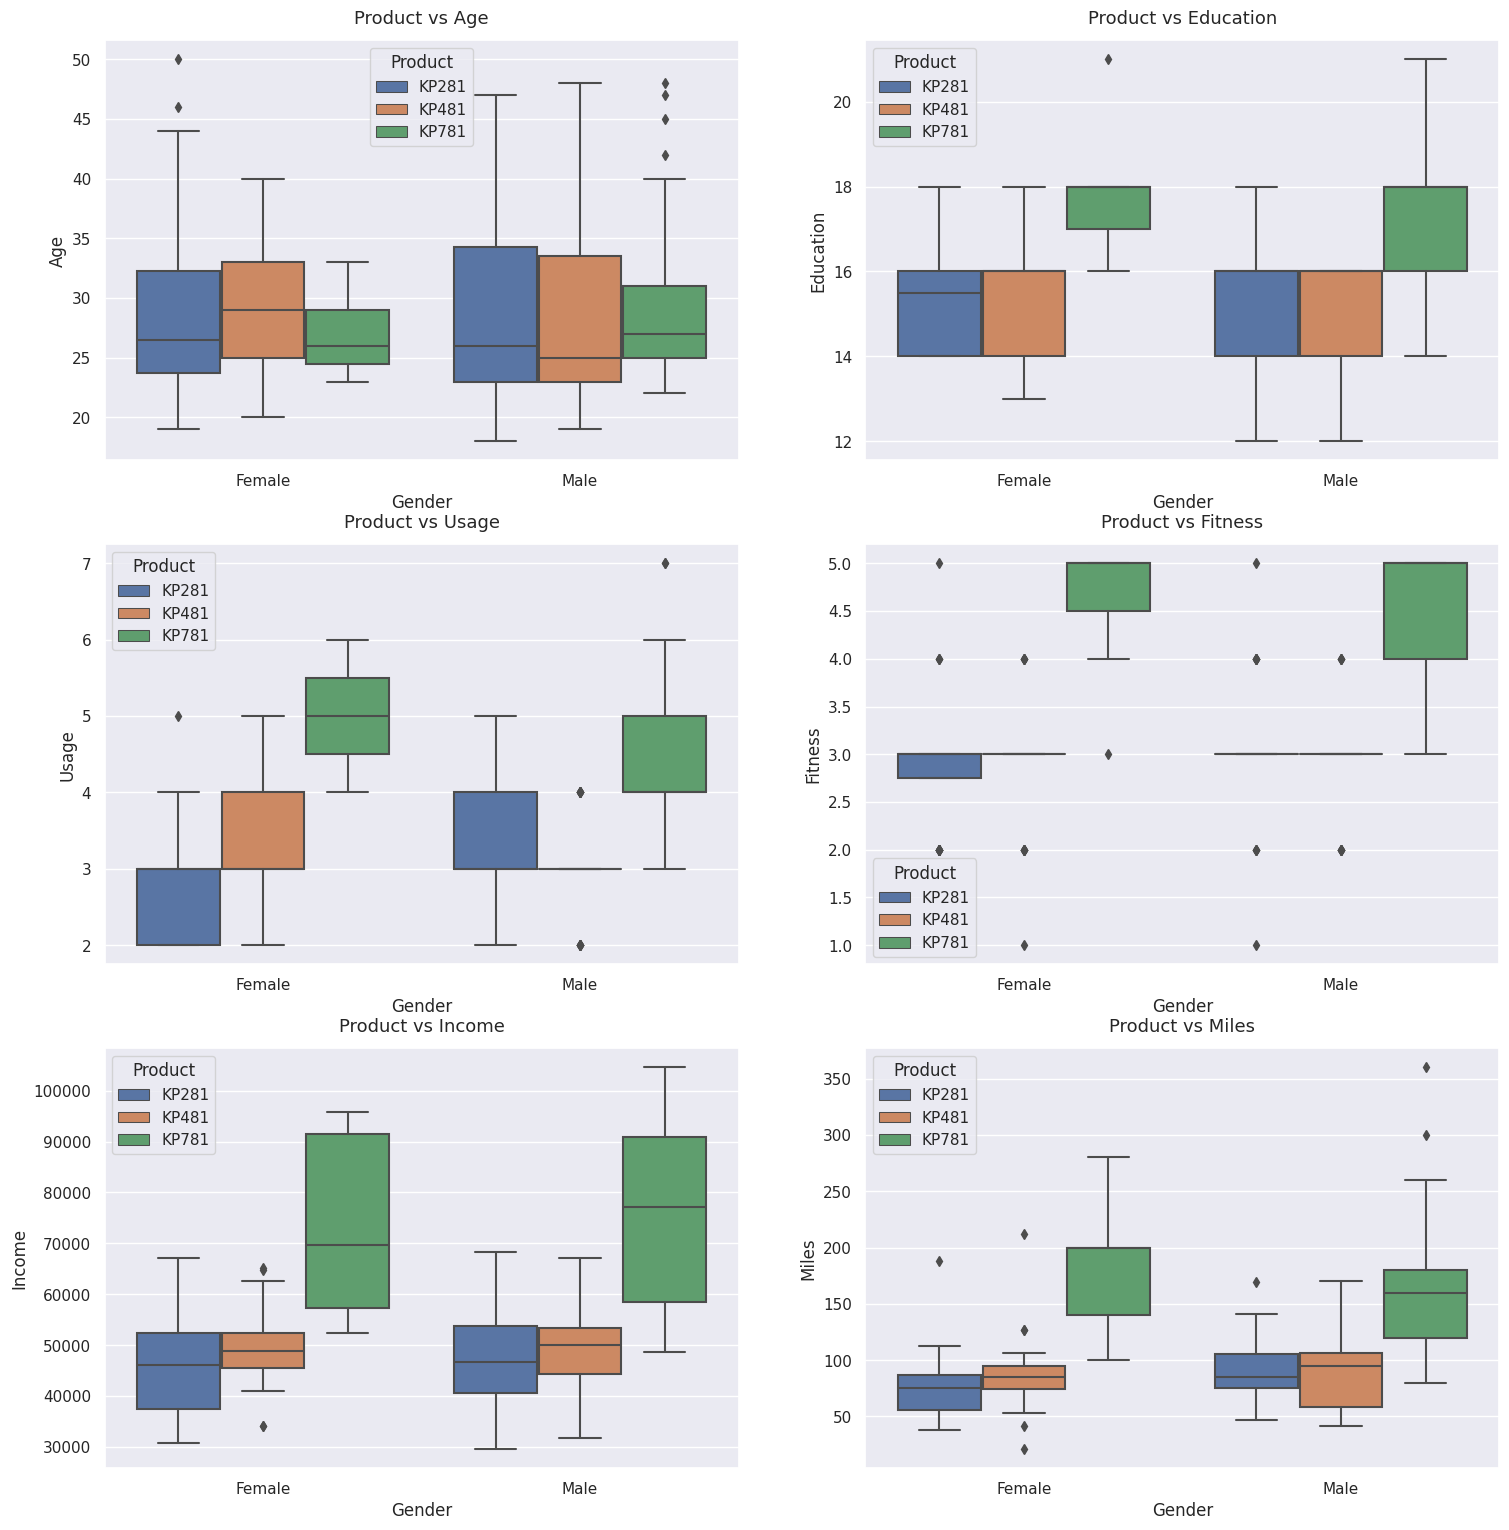

In [ ]:
# List of attributes for comparison
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set seaborn color codes
sns.set(color_codes=True)

# Creating subplots for gender-based attribute comparison
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)

# Counter for attribute indexing
count = 0

# Loop through subplots grid
for i in range(3):
    for j in range(2):
        # Creating box plots for each attribute against gender, with hue for product
        sns.boxplot(data=aerofit_df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])

        # Setting subplot title
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)

        # Incrementing attribute counter
        count += 1

# Display the gender-based attribute comparison plots
plt.show()


### **Key Observation Gender-Based Attribute Comparison with Produc**t:

Among females who intend to use the treadmill 3-4 times a week, a notable inclination towards purchasing the "KP481" product is observed.

Females with income above 55,000 usd , miles greater than 150 were more inclined towards "KP781"

## Correlation Analysis

In [ ]:
# Covariance Calculation
aerofit_df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [ ]:
# Correlation Calculation
aerofit_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


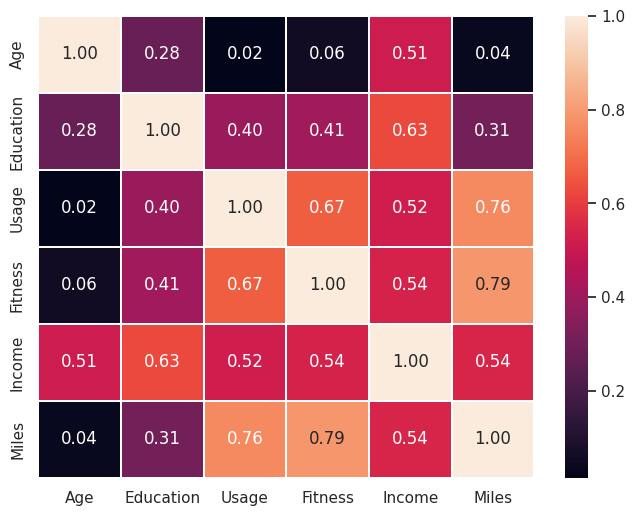

In [ ]:
# Creating a heatmap to visualize correlations
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(color_codes=True)
sns.heatmap(aerofit_df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='0.2f')

# Display the heatmap
plt.show()

### **Key Observations from Correlation Analysis**

- **High correlatio**ns exist between the pairs of attributes `Miles` & `Fitness` and `Miles` & `Usage`. This suggests that individuals with higher fitness levels tend to utilize treadmills more frequently.

- A **strong correlation** is evident between `Income` and `Education`. Those with **higher income and education levels** exhibit a preference for the advanced features of the` KP781` treadmill.

- **No significant correlation** is observed between the pairs of attributes `Usage` & `Age` or `Fitness` & ` Age`. This implies that age should not serve as a barrier to using treadmills or selecting a particular treadmill model.

## Product Purchase Distribution by Gender and Marital Status

In [ ]:
# What is the percentage distribution of customers who have bought the KP281, KP481, or KP781 treadmill products?

# Creating a melted DataFrame (restructured dataframe)
aerofit_df1 = aerofit_df[['Product', 'Gender', 'MaritalStatus']].melt()

# Calculating percentage distribution
percentage_distribution = (aerofit_df1.groupby(['variable', 'value'])[['value']].count() / len(aerofit_df)).mul(100).round(3).astype(str) + '%'

# Displaying the percentage distribution
percentage_distribution

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

## Marginal & Conditional Probabilities

### Probability of Treadmill Purchase Based on Gender

In [ ]:
def probability_product_given_gender(gender, print_marginal=False):
    if gender not in ["Female", "Male"]:
        return "Invalid gender value."

    aerofit_df1 = pd.crosstab(index=aerofit_df['Gender'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][gender] / aerofit_df1.loc[gender].sum()
    p_481 = aerofit_df1['KP481'][gender] / aerofit_df1.loc[gender].sum()
    p_781 = aerofit_df1['KP781'][gender] / aerofit_df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {aerofit_df1.loc['Male'].sum()/len(aerofit_df):.2f}")
        print(f"P(Female): {aerofit_df1.loc['Female'].sum()/len(aerofit_df):.2f}\n")

    print(f"P(KP281/{gender}): {p_281:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")

# Displaying probabilities for Male and Female customers
probability_product_given_gender('Male', True)
probability_product_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



### Probability of Treadmill Purchase Based on Marital Status

In [ ]:
def probability_product_given_mstatus(status, print_marginal=False):
    if status not in ["Single", "Partnered"]:
        return "Invalid marital status value."

    aerofit_df1 = pd.crosstab(index=aerofit_df['MaritalStatus'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][status] / aerofit_df1.loc[status].sum()
    p_481 = aerofit_df1['KP481'][status] / aerofit_df1.loc[status].sum()
    p_781 = aerofit_df1['KP781'][status] / aerofit_df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {aerofit_df1.loc['Single'].sum()/len(aerofit_df):.2f}")
        print(f"P(Partnered): {aerofit_df1.loc['Partnered'].sum()/len(aerofit_df):.2f}\n")

    print(f"P(KP281/{status}): {p_281:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")

# Displaying probabilities for Single and Partnered customers
probability_product_given_mstatus('Single', True)
probability_product_given_mstatus('Partnered')


P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



## Probability of Product- Gender

In [ ]:
# Creating a crosstabulation of Product against Gender
product_gender = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']], margins=True)

# Displaying the crosstabulation
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [63]:
# Probability by Creating a crosstabulation of Product against Gender
pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']], margins=True,normalize=True).mul(100).round(2).astype(str) + '%'

Gender,Female,Male,All
Product,,,
KP281,22.22%,22.22%,44.44%
KP481,16.11%,17.22%,33.33%
KP781,3.89%,18.33%,22.22%
All,42.22%,57.78%,100.0%


### **Key Observations-Probability of specific gender purchasing a specific product.**

Probability of Female purchase treadmill is 42.22%.

- P(KP281|Female) = 22.22%
- P(KP481|Female) = 16.11%
- P(KP781|Female) = 3.88%

Probability of Male purchase treadmill is 57.77%

- P(KP281|Male) = 22.22%
- P(KP481|Male) = 17.22%
- P(KP781|Male) = 18.33%


## Probability of Product-Age

In [51]:
# Creating age based features
aerofit_dfage = aerofit_df.copy()

In [54]:
# Define bins and labels for Age categories
age_bins = [14, 20, 30, 40, 60]
age_labels = ["Teens", "20s", "30s", "Above 40s"]

# Creating AgeGroup and AgeCategory features
aerofit_dfage['AgeGroup'] = pd.cut(aerofit_dfage['Age'], bins=age_bins)
aerofit_dfage['AgeCategory'] = pd.cut(aerofit_dfage['Age'], bins=age_bins, labels=age_labels)

# Displaying the DataFrame with new features
aerofit_dfage.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


In [56]:
# Creating a crosstabulation of Product and AgeCategory
product_age = pd.crosstab(index=aerofit_dfage['Product'], columns=[aerofit_dfage['AgeCategory']], margins=True)

# Displaying the crosstabulation
product_age


AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [62]:
# Creating a crosstabulation of Product and AgeCategory with normalized percentages
product_age_percent = pd.crosstab(index=aerofit_dfage['Product'], columns=[aerofit_dfage['AgeCategory']], margins=True, normalize=True).mul(100).round(2).astype(str) + '%'

# Displaying the normalized percentages
product_age_percent

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,3.33%,27.22%,10.56%,3.33%,44.44%
KP481,2.22%,17.22%,12.78%,1.11%,33.33%
KP781,0.0%,16.67%,3.33%,2.22%,22.22%
All,5.56%,61.11%,26.67%,6.67%,100.0%


In [65]:
# Calculating the probability
prob_20s_to_30s = round((product_age['20s']['All'] / product_age['All']['All']), 2)

# Converting probability to percentage
percentage_20s_to_30s = round(prob_20s_to_30s * 100, 2)

# Displaying the calculated percentage
print(f"Percentage of customers with ages between 20s and 30s: {percentage_20s_to_30s}%")

Percentage of customers with ages between 20s and 30s: 61.0%


### **Key Observations-Probability of purchasing each treadmill product based on Age Categories.**

**Probability of purchasing each treadmill product based on Age Categories:**
- Percentage of customers with ages between 20s and 30s: 61.0%

- P(KP281|All) = 5.56%
- P(KP481|All) = 61.11%
- P(KP781|All) = 26.67%

**20s:**
- P(KP281|20s) = 27.22%
- P(KP481|20s) = 17.22%
- P(KP781|20s) = 16.67%

**30s:**
- P(KP281|30s) = 10.56%
- P(KP481|30s) = 12.78%
- P(KP781|30s) = 3.33%





## Probability of Product-Income

In [66]:
# Creating income based features
aerofit_dfincome = aerofit_df.copy()

In [72]:
# Define income bins and labels
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income', 'Lower-middle Income', 'Upper-Middle Income', 'High Income']

# Create the "IncomeCategory" feature using pd.cut()
aerofit_dfincome['IncomeCategory'] = pd.cut(aerofit_df['Income'], bins=bins_income, labels=labels_income)

# Displaying the DataFrame with new features
aerofit_dfincome.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income


In [73]:
# Create a crosstabulation of Product and IncomeCategory
product_income = pd.crosstab(index=aerofit_dfincome['Product'], columns=[aerofit_dfincome['IncomeCategory']], margins=True)

# Display the crosstabulation
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [74]:
# Creating a crosstabulation of Product and Income Category with normalized percentages
product_income_percent = pd.crosstab(index=aerofit_dfincome['Product'], columns=[aerofit_dfincome['IncomeCategory']], margins=True, normalize=True).mul(100).round(2).astype(str) + '%'

# Displaying the normalized percentages
product_income_percent

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,4.44%,36.67%,3.33%,0.0%,44.44%
KP481,3.33%,26.11%,3.89%,0.0%,33.33%
KP781,0.0%,6.11%,6.67%,9.44%,22.22%
All,7.78%,68.89%,13.89%,9.44%,100.0%


In [75]:
# Calculating the probability of high-income customers purchasing KP781 treadmill
probability_high_income_KP781 = round(product_income['High Income']['KP781'] / product_income['All']['KP781'], 2)
percentage_high_income_KP781 = round(probability_high_income_KP781 * 100, 2)

# Displaying the probability
print(f"Probability of customers with High Income purchasing KP781 treadmill: {percentage_high_income_KP781}%")

Probability of customers with High Income purchasing KP781 treadmill: 42.0%


### **Key Observations-Probability of purchasing each treadmill product based on Income Categories.**

Probability of people with Low Income purchasing the treadmill is 44.44%.

Probability of people with Lower-middle Income purchasing the treadmill is 33.33%.

- P(KP281|Lower-middle Income) = 36.67%
- P(KP481|Lower-middle Income) = 26.11%

Probability of people with Upper-Middle Income purchasing the treadmill is 22.22%.

- P(KP281|Upper-Middle Income) = 3.33%
- P(KP481|Upper-Middle Income) = 3.89%
- P(KP781|Upper-Middle Income) = 6.67%

Probability of people with High Income purchasing the treadmill is 13.89%.

- P(KP781|High Income) = 9.44%

## Probability of Product-Fitness

In [76]:
# Creating a crosstabulation of Product and Fitness
product_fitness = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Fitness']], margins=True)

# Displaying the crosstabulation
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [77]:
# Creating a crosstabulation of Product and Fitness with normalization
product_fitness_normalized = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Fitness']], margins=True, normalize=True).mul(100).round(2).astype(str) + '%'

# Displaying the normalized crosstabulation
product_fitness_normalized

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56%,7.78%,30.0%,5.0%,1.11%,44.44%
KP481,0.56%,6.67%,21.67%,4.44%,0.0%,33.33%
KP781,0.0%,0.0%,2.22%,3.89%,16.11%,22.22%
All,1.11%,14.44%,53.89%,13.33%,17.22%,100.0%


In [79]:
# Calculate the percentage of customers with fitness level 5 buying KP781 treadmill
prob_fitness_5_KP781 = round((product_fitness[5]['KP781'] / product_fitness['All']['KP781']), 2)
pct_fitness_5_KP781 = round(prob_fitness_5_KP781 * 100, 2)
print(f"This indicates that customers with fitness level 5 account for {pct_fitness_5_KP781}% of KP781 treadmill buyers")

This indicates that customers with fitness level 5 account for 72.0% of KP781 treadmill buyers


### **Key Observations-Probability of purchasing each treadmill product based on Fitness Level.**
Customers with fitness level 5 account for 72.0% of KP781 treadmill buyers

Probability of people who has Fitness 3 purchase treadmill is 53.88%.

- P(KP281|Fitness=3) = 30.00%
- P(KP481|Fitness=3) = 21.66%

Probability of people who has Fitness 4 purchase treadmill is 13.33%.

- P(KP281|Fitness=4) = 5.00%
- P(KP481|Fitness=4) = 4.44%

Probability of people who has Fitness 5 purchase treadmill is 17.22%.

- P(KP781|Fitness=5) = 16.11%

## Probability of Product-Marital Status

In [80]:
# Creating a crosstabulation of Product and MaritalStatus
product_marital = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']], margins=True)

# Displaying the crosstabulation
product_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [82]:
# Creating a crosstabulation of Product and MaritalStatus with normalization
product_marital_normalized = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']], margins=True, normalize=True).mul(100).round(2).astype(str) + '%'

# Displaying the normalized crosstabulation
product_marital_normalized


MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67%,17.78%,44.44%
KP481,20.0%,13.33%,33.33%
KP781,12.78%,9.44%,22.22%
All,59.44%,40.56%,100.0%


### **Key Observations-Probability of purchasing each treadmill product based on Marital Satus**

Probability of partnered purchase treadmill is 59.44

- P(KP281|Partnered) = 26.66%
- P(KP481|Partnered) = 20.00%
- P(KP781|Partnered) = 12.77%

Probability of Single purchase treadmill is 40.55

- P(KP281|Single) = 17.77%
- P(KP481|Single) = 13.33%
- P(KP781|Single) = 9.44%

## **Customer Profiles Based on Product Categories:**

**KP281 Treadmill:**

- Affordable entry-level product.
- Popular among customers of all ages.
- Preferred by both males and females.
- Average distance covered around : 70 to 90 miles.
- Usage: 2 to 4 times a week.
- Fitness rating: Average shape (1-4).
- Age: 20 to 40 years.
- Marital status: No significant difference.
- Income: Below $70,000.
- Education: 14 & 16 years.
- Recommendation: Beginners looking for an affordable option with moderate usage.

**KP481 Treadmill:**

- Intermediate level product.
- Popular among younger customers 20 - 40 years.
- Usage: 3 to 6 times a week.
- Fitness rating: Varied (2 to 5).
- Average distance covered: 70 to 130 miles.
- Preferred by females.
- Age: 20 to 40 years.
- Marital status: No significant difference.
- Income:  Below $ 70,000.
- Education: 14 & 16 years.
- Recommendation: Intermediate users focusing on both fitness and covering miles.

**KP781 Treadmill:**

- Advanced product.
- Preferred by customers aiming to cover more distance.
- Usage: 4 to 6 times a week.
- Fitness rating: Excellent shape.
- Average distance covered: 120 to 200+ miles.
- Preferred by males.
- Age: 20 and above.
- Marital status: More preferred by single customers.
- Income: Above $45,000.
- Education: 16 & 18 years.
- Recommendation: Experienced users seeking intense workouts and covering extensive distances.

These profiles offer a simplified overview of the key attributes that influence customer preferences for each product category.

## **Actionable Insights and Recommendations:**

**Insights:**

1. **Gender Preference:** Males have a high likelihood of purchasing the KP781 treadmill, accounting for 82.5% of total KP781 sales. Both genders show relatively equal interest in purchasing KP281 and KP481 treadmills.

2. **Education Impact:** Customers with education levels less than or equal to 16 years are more inclined to purchase KP281 and KP481 treadmills. On the other hand, individuals with education levels greater than or equal to 16 years tend to prefer the KP781 model.

3. **Income Influence:** Customers with an annual income of USD 70,000 or less are more likely to purchase KP281 and KP481 treadmills. In contrast, those with an annual income exceeding USD 45,000 are more likely to opt for the KP781 model.

4. **Usage Behavior:** Customers planning to use the treadmill 4 times a week or more are likely to purchase the KP781 model. Those leaning towards 2 to 4 times weekly usage show interest in KP281 and KP481 treadmills.

5. **Fitness Consideration:** Individuals with fitness levels 4 or below are inclined to buy KP281 and KP481 treadmills. Customers with fitness levels 4 and 5 are more likely to opt for the KP781 model.

**Recommendations:**

1. **Target Income Range:** Aerofit should focus on promoting the KP781 model to individuals with an annual income between USD 40,000 and USD 60,000. This income range shows strong sales across all three models, with potential for increased KP781 sales.

2. **Female Engagement:** To bridge the gender sales gap for the KP781 model (only 18% female buyers), Aerofit should launch special offers, trials, and awareness campaigns specifically targeting female customers.

3. **Education Awareness:** Launch education-focused campaigns targeting customers with 15, 20, and 21 years of education. Highlight the correlation between education and income to capture interest from the 14-year education level segment.

4. **Usage Upselling:** Promote the KP781 model to customers who plan to use the treadmill 4 times a week, as they are likely to purchase KP281 and KP481 models. Provide trial opportunities for the premium model.

5. **Reward Program:** Introduce a rewards program that encourages customers to increase their weekly usage and miles covered. Over time, suggest upgrading to higher-end models using accumulated reward points.

6. **Premium Model Promotion:** Position KP781 as the premium model catering to experienced users seeking intense workouts and advanced features. Utilize influencer marketing and emphasize the benefits of high usage and extensive coverage.

By implementing these insights and recommendations, AeroFit can effectively tailor its marketing strategies and product positioning to target specific customer segments for each treadmill model.